# Exploratory Data Analysis

In [38]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn imports
from sklearn.feature_extraction.text import CountVectorizer

## Import Data

In [5]:
posts = pd.read_csv('../data/combined_genz_mill_posts.csv')

In [6]:
posts.head()

,title,selftext,subreddit
0,What have you learned this week?,NaN,r/GenZ
1,r/GenZ Is in need of more moderators! Read below:,"In the past few months, we've been getting inc...",r/GenZ
2,Who else remembers Net Neutrality and when thi...,NaN,r/GenZ
3,This sub lately.,NaN,r/GenZ
4,You guys are absolutely pathetic,Where do I even start? It's just constant comp...,r/GenZ


## EDA
Let's take a quick look at our data before we begin modelling.

### Null Values

In [15]:
# Any null values?
posts.isnull().sum()

title          0
selftext     543
subreddit      0
dtype: int64

In [16]:
posts.shape

(1926, 3)

It looks like there are 543 posts that do not have anything for selftext. This is over 25% of our rows, which is significant.

In [24]:
empty_posts = posts.groupby('subreddit').selftext.apply(lambda x: x.isnull().sum())
empty_posts.head()

subreddit
r/GenZ           337
r/Millennials    206
Name: selftext, dtype: int64

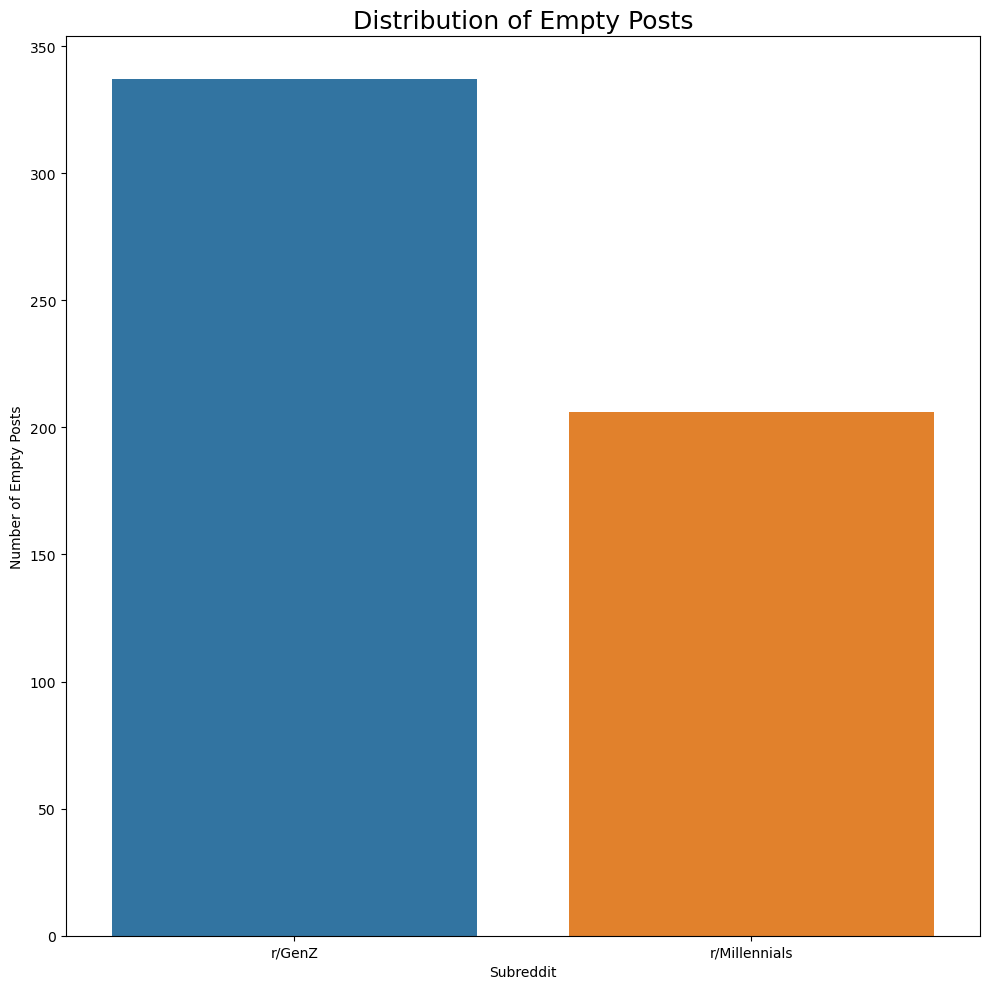

In [27]:
## Size
plt.figure(figsize = (10, 10))

## Plot
sns.barplot(x=empty_posts.index, y=empty_posts)

## Title and labels
plt.title("Distribution of Empty Posts", size = 18)
plt.xlabel("Subreddit")
plt.ylabel("Number of Empty Posts");

## Save as image
plt.tight_layout() 
plt.savefig('../images/empty_post_distribution.png');

**Interpretation:** The posts from r/GenZ have more empty selftexts. This may change as we collect more data, but since we are going to be modeling based on this data, we should consider combining the selftext with the titles of the posts to fix this issue, as opposed to dropping any data.

### Subreddit Distribution

We should have a fairly even amount of data for each subreddit. This may change as we collect more data from each subreddit, depending on the frequency of posts.

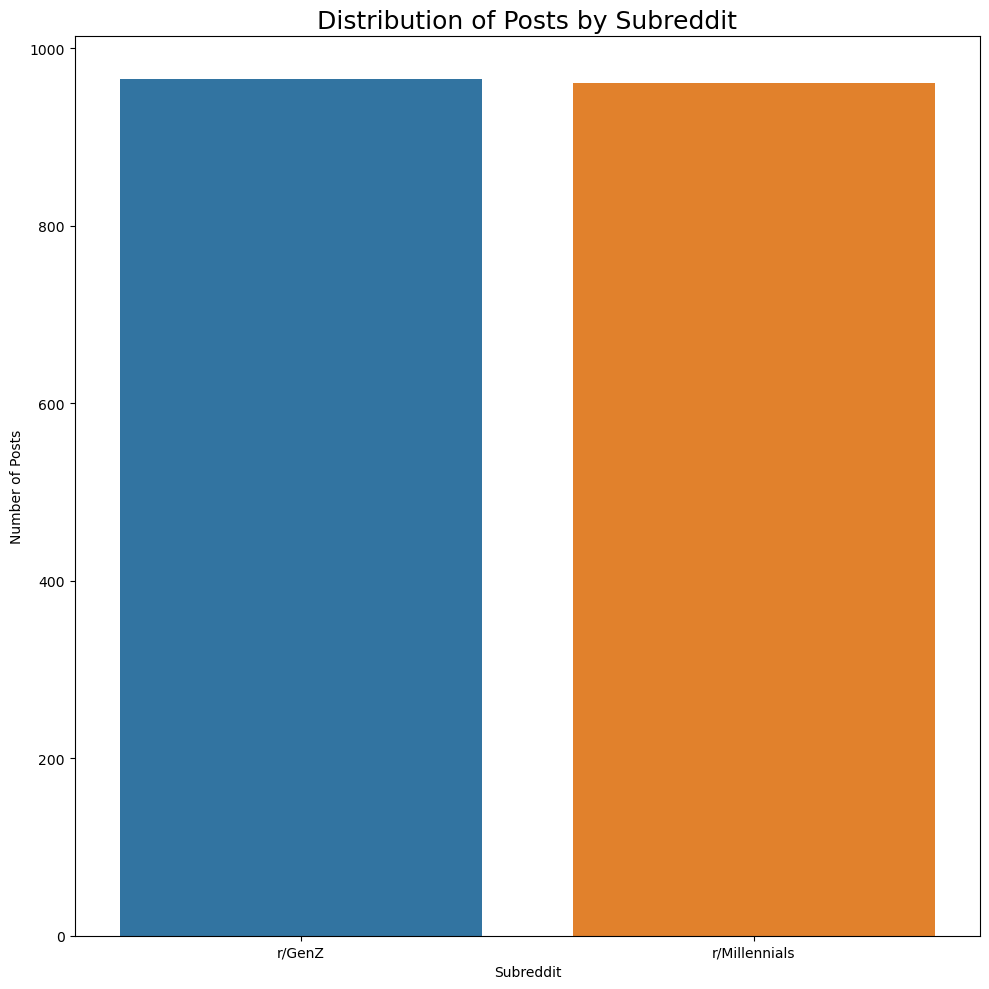

In [28]:
## Size
plt.figure(figsize = (10, 10))

## Plot
sns.countplot(x = posts['subreddit']);

## Title and labels
plt.title("Distribution of Posts by Subreddit", size = 18)
plt.xlabel("Subreddit")
plt.ylabel("Number of Posts");

## Save as image
plt.tight_layout() 
plt.savefig('../images/subreddit_distribution.png');

**Interpretation:**  Because the distribution of posts is practically even, we shouldn't need to stratify or bootstrap our data while modeling. Those are things to keep in mind if the distribution of posts changes when collecting more data.

### Word Counts
Let's look at some common words that may be present in our data using a CountVectorizer, which is one of the methods we will use for modeling later on.

In [31]:
# Data
titles = posts['title']
selftexts = posts['selftext'].dropna()

# Create CountVectorizer
cvec_1 = CountVectorizer()
cvec_2 = CountVectorizer()

# Fit Count Vectorizer
cvec_1.fit(titles)
cvec_2.fit(selftexts)

# Transform
titles = cvec_1.transform(titles)
selftexts = cvec_2.transform(selftexts)

In [34]:
titles_df = pd.DataFrame(titles.todense(), 
                          columns=cvec_1.get_feature_names_out())

selftexts_df = pd.DataFrame(selftexts.todense(), 
                          columns=cvec_2.get_feature_names_out())

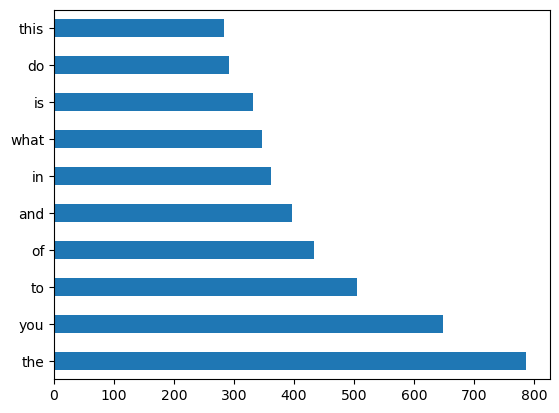

In [36]:
titles_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.savefig('../images/title_common_words.png');


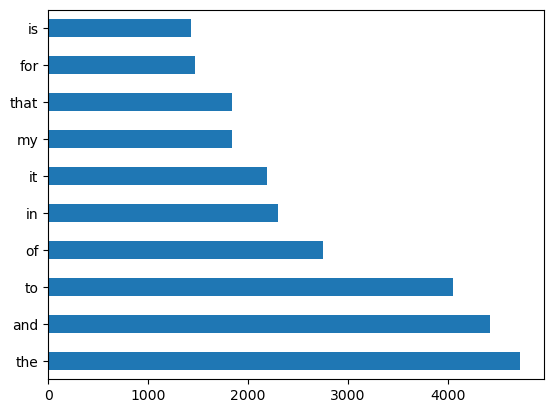

In [37]:
selftexts_df.sum().sort_values(ascending = False).head(10).plot(kind = 'barh');
plt.savefig('../images/selftext_common_words.png');

**Interpretation** Both of these graphs look to be showing words that may show up as stopwords when modeling. A TFIDF Vectorizer may help in simplifying this, so we will try modeling with that method as well.